In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget

from voxel import *
from mol_tools import *

import torch
import torch.nn as nn
import random
from tqdm import tqdm

In [2]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
df

,auid,aurl,compound,composition,species,natoms,spacegroup,pearson_symbol,geometry,positions_fractional,positions_cartesian,enthalpy_atom,enthalpy_formation_atom
0,aflow:c2bae074d76f81b6,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1F3...,Ag1F3Zn1,"[1, 3, 1]","[Ag, F, Zn]",5,221,cP5,"[3.979183, 3.979183, 3.979183, 90.0, 90.0, 90.0]","[[0.0, 0.0, 0.0], [0.5, 0.5, 0.0], [0.0, 0.5, ...","[[0.0, 0.0, 0.0], [1.98959, 1.98959, -0.0], [0...",-3.35725,None
1,aflow:c568d79d0d0e9fc8,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1Mn...,Ag1Mn3N1,"[1, 3, 1]","[Ag, Mn, N]",5,221,cP5,"[4.265445, 4.265445, 4.265445, 90.0, 90.0, 90.0]","[[0.0, 0.0, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[0.0, 0.0, 0.0], [0.0, 2.13272, 2.13272], [2....",-5.99960,None
2,aflow:8944b3eb2c189cb7,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag1Nb...,Ag1Nb1O3,"[1, 1, 3]","[Ag, Nb, O]",5,221,cP5,"[4.000268, 4.000268, 4.000268, 90.0, 90.0, 90.0]","[[0.5, 0.5, 0.5], [0.0, 0.0, 0.0], [0.0, 0.0, ...","[[2.00013, 2.00013, 2.00013], [0.0, 0.0, 0.0],...",-6.76521,None
3,aflow:9da57f587b92d20f,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Ag3I1...,Ag3I1S1,"[3, 1, 1]","[Ag, I, S]",5,221,cP5,"[5.0311, 5.0311, 5.0311, 90.0, 90.0, 90.0]","[[0.5, 0.5, 0.0], [0.0, 0.5, 0.5], [0.5, 0.0, ...","[[2.51555, 2.51555, 0.0], [-0.0, 2.51555, 2.51...",-1.61106,None
4,aflow:d43abd3deaeccc51,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/Al1Bi...,Al1Bi1O3,"[1, 1, 3]","[Al, Bi, O]",5,221,cP5,"[3.793297, 3.793297, 3.793297, 90.0, 90.0, 90.0]","[[0.5, 0.5, 0.5], [0.0, 0.0, 0.0], [0.0, 0.5, ...","[[1.89665, 1.89665, 1.89665], [0.0, 0.0, 0.0],...",-6.54116,-2.28122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,aflow:e2807ec9ea15f2f7,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...,O3Sr1Zr1,"[3, 1, 1]","[O, Sr, Zr]",5,221,cP5,"[4.198551, 4.198551, 4.198551, 90.0, 90.0, 90.0]","[[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...","[[2.09928, -0.0, 0.0], [0.0, 2.09928, -0.0], [...",-8.21154,-3.46243
758,aflow:80368671f9d16cb2,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...,O3Sr1Zr1,"[3, 1, 1]","[O, Sr, Zr]",5,221,cP5,"[4.401751, 4.401751, 4.401751, 90.0, 90.0, 90.0]","[[0.0, 0.0, 0.5], [0.5, 0.0, 0.0], [0.0, 0.5, ...","[[0.0, 0.0, 2.20088], [2.20088, 0.0, 0.0], [0....",-5.73222,-0.983113
759,aflow:d94ef5a92bb70b71,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...,O3Sr1Zr1,"[3, 1, 1]","[O, Sr, Zr]",5,221,cP5,"[4.200047, 4.200047, 4.200047, 90.0, 90.0, 90.0]","[[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...","[[2.10002, 0.0, 0.0], [0.0, 2.10002, 0.0], [0....",-8.21154,-3.46244
760,aflow:32ccebcea1af1ec7,aflowlib.duke.edu:AFLOWDATA/ICSD_WEB/CUB/O3Sr1...,O3Sr1Zr1,"[3, 1, 1]","[O, Sr, Zr]",5,221,cP5,"[4.198544, 4.198544, 4.198544, 90.0, 90.0, 90.0]","[[0.5, 0.0, 0.0], [0.0, 0.5, 0.0], [0.0, 0.0, ...","[[2.09927, 0.0, 0.0], [0.0, 2.09927, 0.0], [-0...",-8.21154,-3.46243


In [3]:
def get_all_elements(df):
      return np.unique(np.hstack(np.array(df.species)))

In [4]:
def prepare_single_channel_data(df, sigma, L, N):
    df = df.drop_duplicates(subset="compound", keep="first")
    print("Number of molecules", df.shape[0])
    
    width = 2 * np.pi / L * N
    adj_width = width*np.sqrt(3)
    
    names = []
    reciprocal_data = []
    ys = []
    for index, mol in df.iterrows():
        A = calc_basis(mol.geometry)
        coords = calc_cartesian_positions(A, mol.positions_fractional)
        mx, my, mz = get_mesh_coords(A, adj_width)
        B, G, SG = reciprocal_lattice_gaussian(A, coords, sigma, mx, my, mz)

        names.append(mol.compound)
        reciprocal_data.append((G, SG))
        ys.append(mol.enthalpy_atom)
                    
    return names, reciprocal_data, ys
        

In [5]:
def prepare_multi_channel_data(df, sigma, L, N, elements):
    df = df.drop_duplicates(subset="compound", keep="first")
    print("Number of molecules", df.shape[0])
    
    width = 2 * np.pi / L * N
    adj_width = width*np.sqrt(3)
    
    names = []
    reciprocal_data = []
    ys = []
    for index, mol in df.iterrows():
        A = calc_basis(mol.geometry)
        coords = calc_cartesian_positions(A, mol.positions_fractional)
        mx, my, mz = get_mesh_coords(A, adj_width)

        # atom coordinations are order accoring to composition and species    
        cs = np.cumsum(mol.composition)
        cs = np.insert(cs, 0, 0) # insert 0 at beginning

        rd = [] # collect G and SG for all elements
        for i, element in enumerate(mol.species):
            element_coords = coords[cs[i]:cs[i+1]] # extract coordinates corresponding to atoms of one element
            B, G, SG = reciprocal_lattice_gaussian(A, element_coords, sigma, mx, my, mz)

            j = np.where(elements == element)[0][0] # get channel for element
            rd.append((j, element, (G, SG)))
            
        
        names.append(mol.compound)
        reciprocal_data.append(rd)
        ys.append(mol.enthalpy_atom)
                    
    return names, reciprocal_data, ys

In [6]:
class MolLoader(object):
    def __init__(self, names, reciprocal_data, ys, L, N, batch_size, nchannel=1,
                 shuffle=False, rotate_randomly=False, device=torch.device('cpu')):
        
        self.names = names
        self.reciprocal_data = reciprocal_data
        self.ys = ys
        self.batch_size = batch_size
        self.rotate_randomly = rotate_randomly
        self.device = device
        
        self.L = L
        self.N = N
        self.nchannel = nchannel
        
        self.shuffle = shuffle
        self.current = 0
        self.indices = np.arange(len(ys))
        self.N_data = len(self.indices)
        
    def __iter__(self):
        return self
    
    def __next__(self):
         return self.next()

    def __len__(self):
        return int(np.ceil(self.N_data / self.batch_size))

    def next(self):
        N_data = self.N_data
        N = self.N # number of voxels
        L = self.L
        nchan = self.nchannel
        
        if self.current == 0 and self.shuffle:
            np.random.shuffle(self.indices)
        
        if self.current < N_data:
            n1 = self.current
            n2 = min(self.current + self.batch_size, N_data)
            
            x_names = []
            x = np.zeros((n2-n1, nchan, N, N, N), dtype="float32")
            y = np.zeros((n2-n1,1), dtype="float32")
            
            for i, j in enumerate(range(n1, n2)):
                data_index = self.indices[j] # supports shuffling
                
                y[i] = self.ys[data_index]
                x_names.append(self.names[data_index])
                
                R = np.eye(3)
                if self.rotate_randomly:
                    R = get_random_3D_rotation_matrix()
                
                if nchan == 1:
                    G, SG = self.reciprocal_data[data_index]
                    descriptor = adapt_to_voxel_grid(G, SG, L, N, rot=R)
                    x[i, 0, :, :, :] = descriptor
                else:
                    for j, element, (G, SG) in self.reciprocal_data[data_index]:
                        descriptor = adapt_to_voxel_grid(G, SG, L, N, rot=R)
                        x[i, j, :, :, :] = descriptor
                                           
            
            self.current = n2
            
            x = torch.from_numpy(x).to(self.device, non_blocking=True)
            y = torch.from_numpy(y).to(self.device, non_blocking=True)
            
            return (x_names, x, y)
        
        self.current = 0
        # print("Stop Iteration")
        raise StopIteration()
    

In [7]:
names, reciprocal_data, ys = prepare_single_channel_data(df, sigma=0.1, L=12.8, N=32)
reciprocal_data[0]

Number of molecules 377


(array([[-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
          14.21112519,  14.21112519],
        [-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
          14.21112519,  14.21112519],
        [-14.21112519, -12.63211128, -11.05309737, ...,  11.05309737,
          12.63211128,  14.21112519]]),
 array([0.00230204-1.61681006e-17j, 0.00094849-7.90097448e-18j,
        0.00343056-1.56888003e-17j, ..., 0.00343056+1.56888003e-17j,
        0.00094849+7.90097448e-18j, 0.00230204+1.61681006e-17j]))

In [8]:
%%time
ml = MolLoader(names, reciprocal_data, ys, 
               L=12.8, N=32, batch_size=32, nchannel=1,
               shuffle=False, rotate_randomly=True)

for i, (names, x, y) in enumerate(ml):
    print(i, names, x.shape, y.shape)
    break

0 ['Ag1F3Zn1', 'Ag1Mn3N1', 'Ag1Nb1O3', 'Ag3I1S1', 'Al1Bi1O3', 'Al1C1Ce3', 'Al1C1Co3', 'Al1C1Dy3', 'Al1C1Er3', 'Al1C1Fe3', 'Al1C1Gd3', 'Al1C1Ho3', 'Al1C1La3', 'Al1C1Mn3', 'Al1C1Nd3', 'Al1C1Pr3', 'Al1C1Pt3', 'Al1C1Sc3', 'Al1C1Tb3', 'Al1C1Ti3', 'Al1C1Tm3', 'Al1C1Y3', 'Al1Ce1O3', 'Al1Ce3N1', 'Al1Dy3N1', 'Al1Er3N1', 'Al1Gd3N1', 'Al1Ho3N1', 'Al1La1O3', 'Al1La3N1', 'Al1Lu3N1', 'Al1N1Nd3'] torch.Size([32, 1, 32, 32, 32]) torch.Size([32, 1])
Wall time: 104 ms


In [9]:
elements = get_all_elements(df)
elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir',
       'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd',
       'Ni', 'O', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Si', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Th',
       'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr'],
      dtype='<U2')

In [10]:
names, reciprocal_data, ys = prepare_multi_channel_data(df, sigma=0.1, L=12.8, N=32, elements=elements)
reciprocal_data[0]

Number of molecules 377


[(0,
  'Ag',
  (array([[-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
            14.21112519,  14.21112519],
          [-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
            14.21112519,  14.21112519],
          [-14.21112519, -12.63211128, -11.05309737, ...,  11.05309737,
            12.63211128,  14.21112519]]),
   array([0.00076735+0.j, 0.00094849+0.j, 0.00114352+0.j, ...,
          0.00114352+0.j, 0.00094849+0.j, 0.00076735+0.j]))),
 (21,
  'F',
  (array([[-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
            14.21112519,  14.21112519],
          [-14.21112519, -14.21112519, -14.21112519, ...,  14.21112519,
            14.21112519,  14.21112519],
          [-14.21112519, -12.63211128, -11.05309737, ...,  11.05309737,
            12.63211128,  14.21112519]]),
   array([ 0.00230204-2.14315368e-17j, -0.00094849+1.85850026e-18j,
           0.00343056-3.13776006e-17j, ...,  0.00343056+3.13776006e-17j,
          -0.00094849-1.85850026

In [11]:
%%time
ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=32, nchannel=len(elements),
               shuffle=False, rotate_randomly=True)

for i, (names, x, y) in enumerate(ml):
    print(i, names, x.shape, y.shape)
    break

0 ['Ag1F3Zn1', 'Ag1Mn3N1', 'Ag1Nb1O3', 'Ag3I1S1', 'Al1Bi1O3', 'Al1C1Ce3', 'Al1C1Co3', 'Al1C1Dy3', 'Al1C1Er3', 'Al1C1Fe3', 'Al1C1Gd3', 'Al1C1Ho3', 'Al1C1La3', 'Al1C1Mn3', 'Al1C1Nd3', 'Al1C1Pr3', 'Al1C1Pt3', 'Al1C1Sc3', 'Al1C1Tb3', 'Al1C1Ti3', 'Al1C1Tm3', 'Al1C1Y3', 'Al1Ce1O3', 'Al1Ce3N1', 'Al1Dy3N1', 'Al1Er3N1', 'Al1Gd3N1', 'Al1Ho3N1', 'Al1La1O3', 'Al1La3N1', 'Al1Lu3N1', 'Al1N1Nd3'] torch.Size([32, 76, 32, 32, 32]) torch.Size([32, 1])
Wall time: 286 ms


In [12]:
def seed_everything(seed=0):
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)

In [13]:
def count_parameters(model):
    s = 0
    for t in model.parameters():
        s += np.prod(t.shape)
    return s

In [14]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        # print("CUDA version:", torch.version.cuda)
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [15]:
class VoxelNet(nn.Module):
    def __init__(self, in_channels=1):
        super().__init__()
        # (N, C, D, H, W)
        self.conv1 = nn.Sequential(
            nn.Conv3d(in_channels, 16, 3, padding=0, stride=1),
            nn.BatchNorm3d(16),
            nn.LeakyReLU(0.3),
            nn.MaxPool3d(2))
        
        self.conv2 = nn.Sequential(
            nn.Conv3d(16, 16, 3, padding=0, stride=1),
            nn.LeakyReLU(0.3),
            nn.MaxPool3d(2))
        
        self.conv3 = nn.Sequential(
            nn.Conv3d(16, 16, 3, padding=0, stride=1),
            nn.LeakyReLU(0.3))
        
        self.regressor = nn.Sequential(nn.Flatten(),
                                        nn.Linear(1024, 32),
                                        nn.LeakyReLU(0.3),
                                        nn.Linear(32, 8),
                                        nn.LeakyReLU(0.3),
                                        nn.Linear(8, 1))
    def forward(self, x):
        #print(x.shape)
        x = self.conv1(x)
        # print("conv1", x.shape)
        x = self.conv2(x)
        # print("conv2", x.shape)
        x = self.conv3(x)
        # print("conv3", x.shape)
        x = self.regressor(x)
        return x

In [16]:
@torch.no_grad()
def predict(model, loader):
    model.eval()
    ys = []
    y_hats = []
    
    for names, x, y in loader:
        y_hat = model(x)
        
        ys.append(y.cpu().numpy())
        y_hats.append(y_hat.cpu().numpy())

    ys = np.vstack(ys).reshape(-1)
    y_hats = np.vstack(y_hats).reshape(-1)
    return ys, y_hats

In [17]:
def fit(epochs, model, train_loader, val_loader, opt, lr, weight_decay):
    t0 = time.time()
    
    optimizer = opt(model.parameters(), lr=lr, weight_decay=weight_decay)
    
    loss = nn.MSELoss()
    
    train_mse = []
    val_mse = []
    
    for epoch in range(epochs):
        train_losses = []
        
        ys = []
        y_hats = []
        
        # Training Phase 
        model.train()
        for names, x, y in train_loader:
            # print(names)
            y_hat = model(x)
            out = loss(y_hat, y)
            out.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            train_losses.append(out.cpu().detach().numpy())
            
            ys.append(y.cpu().numpy())
            y_hats.append(y_hat.cpu().detach().numpy())
            # print(out.cpu().detach().numpy(), np.mean((ys[-1] - y_hats[-1])**2))
            
        # print(np.vstack(train_losses))
        # mean_loss = np.mean(np.vstack(train_losses))
        ys = np.vstack(ys).reshape(-1)
        y_hats = np.vstack(y_hats).reshape(-1)
        mean_loss = np.mean((ys - y_hats)**2)
        train_mse.append(mean_loss)
        
        model.eval()
        ys_val, y_hats_val = predict(model, val_loader)
        mean_loss_val = np.mean((ys_val - y_hats_val)**2)
        val_mse.append(mean_loss_val)
        
        print(f"Epoch {epoch}: train loss {mean_loss} val loss {mean_loss_val}")
    
    
        
    t1 = time.time()
    print(f"Finished in {t1-t0:.4f}s.")
    
    plt.plot(train_mse, label="train")
    plt.plot(val_mse, label="validation")
    plt.legend()
    plt.show()

### Single Channel

In [18]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")
# df = pd.read_pickle("all_221_cp5_3_species_oxides.pkl")
names, reciprocal_data, ys = prepare_single_channel_data(df, sigma=0.1, L=12.8, N=32)

Number of molecules 377


In [19]:
net = VoxelNet(1)
count_parameters(net)

47409

Epoch 0: train loss 12.799410820007324 val loss 29.681055068969727
Epoch 1: train loss 3.359445571899414 val loss 29.49520492553711
Epoch 2: train loss 2.8248496055603027 val loss 28.795269012451172
Epoch 3: train loss 2.66140079498291 val loss 27.35956573486328
Epoch 4: train loss 2.865010976791382 val loss 24.743860244750977
Epoch 5: train loss 2.818406581878662 val loss 20.914283752441406
Epoch 6: train loss 2.695875644683838 val loss 15.813121795654297
Epoch 7: train loss 2.568056583404541 val loss 9.099700927734375
Epoch 8: train loss 2.5340991020202637 val loss 4.2201972007751465
Epoch 9: train loss 2.6075799465179443 val loss 3.3456645011901855
Finished in 23.6553s.


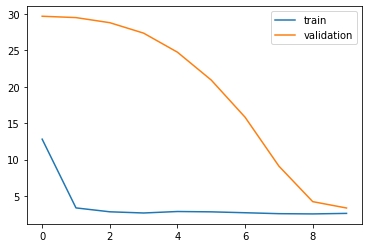

In [20]:
seed_everything()
device = get_default_device()

net = VoxelNet(1)
net = net.to(device)

ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=32, nchannel=1,
               shuffle=True, rotate_randomly=True, device=device)

val_ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=128, nchannel=1,
               shuffle=False, rotate_randomly=False, device=device)

fit(10, net, ml, val_ml, torch.optim.Adam, lr=0.001, weight_decay=0)

In [21]:
ml_pred = MolLoader(names, reciprocal_data, ys,
                    L=12.8, N=32, batch_size=128, nchannel=1,
                    shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
np.mean((ys - y_hats)**2)

3.3456645

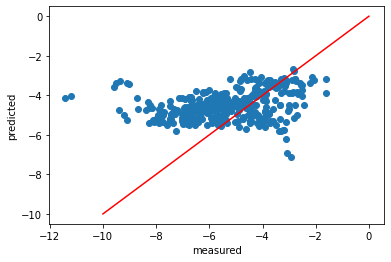

In [22]:
plt.scatter(ys, y_hats)
plt.xlabel("measured")
plt.ylabel("predicted")
plt.plot([-10,0], [-10,0], c="red")

### Multi Channel

In [23]:
df = pd.read_pickle("icsd_221_cp5_3_species.pkl")

In [24]:
elements = get_all_elements(df)
elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'H', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir',
       'K', 'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd',
       'Ni', 'O', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb', 'Rh',
       'Ru', 'S', 'Sb', 'Sc', 'Si', 'Sn', 'Sr', 'Ta', 'Tb', 'Tc', 'Th',
       'Ti', 'Tl', 'Tm', 'U', 'V', 'W', 'Y', 'Yb', 'Zn', 'Zr'],
      dtype='<U2')

In [25]:
nchannel = len(elements)
nchannel

76

In [26]:
net = VoxelNet(nchannel)
count_parameters(net)

79809

In [27]:
names, reciprocal_data, ys = prepare_multi_channel_data(df, sigma=0.1, L=12.8, N=32, elements=elements)

Number of molecules 377


### Test if can learn by heart

Epoch 0: train loss 24.325855255126953 val loss 26.14402961730957
Epoch 1: train loss 6.781316757202148 val loss 23.8813533782959
Epoch 2: train loss 3.5250461101531982 val loss 25.00617790222168
Epoch 3: train loss 1.3027654886245728 val loss 23.231576919555664
Epoch 4: train loss 2.027841329574585 val loss 25.006980895996094
Epoch 5: train loss 0.7106178402900696 val loss 24.236907958984375
Epoch 6: train loss 0.6174508929252625 val loss 24.5247745513916
Epoch 7: train loss 0.3304109573364258 val loss 24.1269588470459
Epoch 8: train loss 0.24467603862285614 val loss 23.38193130493164
Epoch 9: train loss 0.17715896666049957 val loss 22.5710506439209
Finished in 100.1553s.


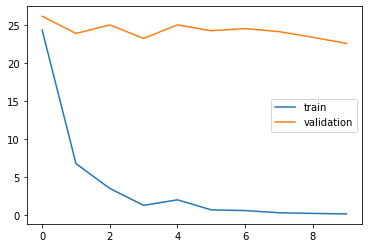

In [28]:
seed_everything()
device = get_default_device()

net = VoxelNet(nchannel)
net = net.to(device)

ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=64, nchannel=nchannel,
               shuffle=False, rotate_randomly=False, device=device)

fit(10, net, ml, ml, torch.optim.Adam, lr=0.001, weight_decay=0)

In [29]:
ml_pred = MolLoader(names, reciprocal_data, ys,
                   L=12.8, N=32, batch_size=64, nchannel=nchannel,
                   shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
np.mean((y_hats - ys)**2) # batchnorm running mean problem

22.57105

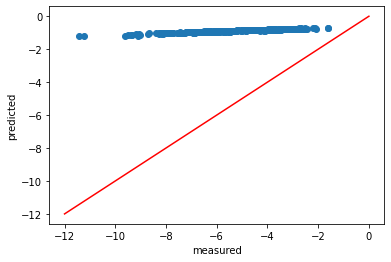

In [30]:
plt.scatter(ys, y_hats)
plt.xlabel("measured")
plt.ylabel("predicted")
plt.plot([-12,0], [-12,0], c="red")

### ICSD

Epoch 0: train loss 15.61405086517334 val loss 23.795429229736328
Epoch 1: train loss 2.496857166290283 val loss 23.185665130615234
Epoch 2: train loss 1.0151522159576416 val loss 22.266464233398438
Epoch 3: train loss 0.6583719849586487 val loss 21.69236183166504
Epoch 4: train loss 0.4169158637523651 val loss 19.699363708496094
Epoch 5: train loss 0.25485798716545105 val loss 17.179174423217773
Epoch 6: train loss 0.290320485830307 val loss 13.273589134216309
Epoch 7: train loss 0.19839206337928772 val loss 6.748119354248047
Epoch 8: train loss 0.12151242792606354 val loss 3.3991682529449463
Epoch 9: train loss 0.10166831314563751 val loss 0.9724891185760498
Epoch 10: train loss 0.07384781539440155 val loss 0.7081972360610962
Epoch 11: train loss 0.07171857357025146 val loss 1.4271246194839478
Epoch 12: train loss 0.06153148040175438 val loss 1.2876280546188354
Epoch 13: train loss 0.07477942109107971 val loss 0.38130220770835876
Epoch 14: train loss 0.06683330237865448 val loss 7.49

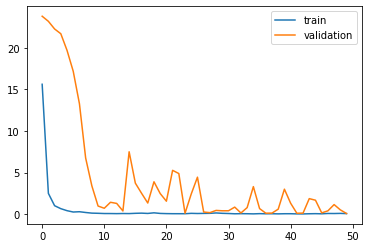

In [31]:
seed_everything()
device = get_default_device()

net = VoxelNet(nchannel)
net = net.to(device)

ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=32, nchannel=nchannel,
               shuffle=True, rotate_randomly=True, device=device)

ml_val = MolLoader(names, reciprocal_data, ys,
                   L=12.8, N=32, batch_size=128, nchannel=nchannel,
                   shuffle=False, rotate_randomly=False, device=device)

fit(50, net, ml, ml_val, torch.optim.Adam, lr=0.001, weight_decay=0)

In [32]:
ml_pred = MolLoader(names, reciprocal_data, ys,
                   L=12.8, N=32, batch_size=128, nchannel=nchannel,
                   shuffle=False, rotate_randomly=False, device=device)
ys, y_hats = predict(net, ml_pred)
np.mean((ys - y_hats)**2)

0.07744

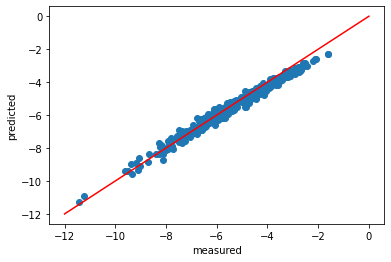

In [33]:
plt.scatter(ys, y_hats)
plt.xlabel("measured")
plt.ylabel("predicted")
plt.plot([-12,0], [-12,0], c="red")

### All Oxides

In [34]:
df = pd.read_pickle("all_221_cp5_3_species_oxides.pkl")

In [35]:
elements = get_all_elements(df)
elements

array(['Ag', 'Al', 'As', 'Au', 'B', 'Ba', 'Be', 'Bi', 'Br', 'C', 'Ca',
       'Cd', 'Ce', 'Cl', 'Co', 'Cr', 'Cs', 'Cu', 'Dy', 'Er', 'Eu', 'F',
       'Fe', 'Ga', 'Gd', 'Ge', 'Hf', 'Hg', 'Ho', 'I', 'In', 'Ir', 'K',
       'La', 'Li', 'Lu', 'Mg', 'Mn', 'Mo', 'N', 'Na', 'Nb', 'Nd', 'Ni',
       'O', 'Os', 'P', 'Pa', 'Pb', 'Pd', 'Pr', 'Pt', 'Pu', 'Rb', 'Re',
       'Rh', 'Ru', 'S', 'Sb', 'Sc', 'Se', 'Si', 'Sn', 'Sr', 'Ta', 'Tb',
       'Tc', 'Te', 'Th', 'Ti', 'Tl', 'U', 'V', 'W', 'Xe', 'Y', 'Yb', 'Zn',
       'Zr'], dtype='<U2')

In [36]:
nchannel = len(elements)
nchannel

79

In [37]:
net = VoxelNet(nchannel)
count_parameters(net)

81105

In [38]:
names, reciprocal_data, ys = prepare_multi_channel_data(df, sigma=0.1, L=12.8, N=32, elements=elements)

Number of molecules 1983


Epoch 0: train loss 4.218752861022949 val loss 20.434499740600586
Epoch 1: train loss 0.328640341758728 val loss 4.3721842765808105
Epoch 2: train loss 0.29131999611854553 val loss 0.35775232315063477
Epoch 3: train loss 0.21415124833583832 val loss 0.2813297212123871
Epoch 4: train loss 0.20470185577869415 val loss 17.02375602722168
Epoch 5: train loss 0.17262989282608032 val loss 0.4560994505882263
Epoch 6: train loss 0.15033058822155 val loss 0.20192864537239075
Epoch 7: train loss 0.12686829268932343 val loss 1.2473347187042236
Epoch 8: train loss 0.12264467775821686 val loss 0.5231465697288513
Epoch 9: train loss 0.12450572848320007 val loss 74.21761322021484
Epoch 10: train loss 0.15189744532108307 val loss 1.3519333600997925
Epoch 11: train loss 0.1577569544315338 val loss 9.676894187927246
Epoch 12: train loss 0.10623323172330856 val loss 17.93670082092285
Epoch 13: train loss 0.09546640515327454 val loss 0.5641013979911804
Epoch 14: train loss 0.08720175921916962 val loss 0.68

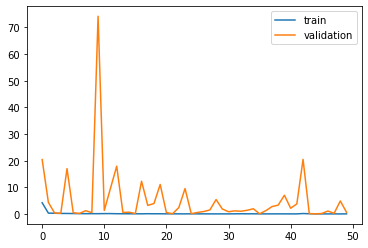

In [39]:
seed_everything()
device = get_default_device()

net = VoxelNet(nchannel)
net = net.to(device)

ml = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=32, nchannel=nchannel,
               shuffle=True, rotate_randomly=True, device=device)

ml_val = MolLoader(names, reciprocal_data, ys,
               L=12.8, N=32, batch_size=128, nchannel=nchannel,
               shuffle=False, rotate_randomly=False, device=device)

fit(50, net, ml, ml_val, torch.optim.Adam, lr=0.001, weight_decay=0)

In [40]:
ml_pred = MolLoader(names, reciprocal_data, ys,
                   L=12.8, N=32, batch_size=128, nchannel=nchannel,
                   shuffle=True, rotate_randomly=True, device=device)
ys, y_hats = predict(net, ml_pred)
np.mean((ys - y_hats)**2)

0.6393197

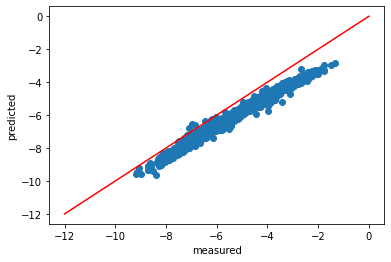

In [41]:
plt.scatter(ys, y_hats)
plt.xlabel("measured")
plt.ylabel("predicted")
plt.plot([-12,0], [-12,0], c="red")